# Numérisation de l'étude d'impact

Ce document montre les résultats de la numérisation de certaines figures extraites de l'étude d'impact.

Références : 
* Projet de loi instituant un système universel de retraite. - Etude d’impact, 24 janvier 2020
* https://github.com/markummitchell/engauge-digitizer



## Méthode

Nous avons utilisé le logiciel "Engauge Digitizer" version 10.10 pour Linux. Nous avons utilisé l'outil "Curve" pour identifier les courbes avec un paramétrage associé à une interpolation linéaire. Pour nous avons exporté les courbes au format CSV. Nous avons ensuite retraité le fichier brut pour ne conserver que les valeurs pertinentes. 

## Pension annuelle de droit direct

Le graphique 59 page 176 présente la pension annuelle de droit direct moyenne hors réforme et dans le système universel.

![Graphique 59 : pension annuelle de droit direct](EtudeImpact-Graphique-59-PensionAnnuelle.png)


In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
from retraites.EtudeImpact import EtudeImpact
import numpy as np
import pylab as pl

In [2]:
pension_data = np.genfromtxt('EtudeImpact-Graphique-59-PensionAnnuelle-propre.csv', delimiter=',')
pension_data

array([[       nan,        nan,        nan],
       [ 1974.9532, 19652.1   , 19503.1   ],
       [ 1975.9955, 19844.2   , 19590.3   ],
       [ 1976.97  , 20118.3   , 19692.2   ],
       [ 1977.9938, 20358.1   , 19821.6   ],
       [ 1979.0222, 20613.9   , 19914.1   ],
       [ 1980.012 , 20900.7   , 20056.5   ],
       [ 1980.9821, 21290.6   , 20375.5   ],
       [ 1981.9988, 21210.4   , 20196.8   ],
       [ 1982.9793, 21725.6   , 20547.1   ],
       [ 1984.0252, 21935.4   , 20637.7   ],
       [ 1985.0459, 22264.5   , 20894.4   ],
       [ 1985.9969, 22849.2   , 21324.6   ],
       [ 1987.0383, 22841.9   , 21174.6   ],
       [ 1988.011 , 23256.9   , 21490.9   ],
       [ 1989.0316, 23625.    , 21722.7   ],
       [ 1990.064 , 23750.3   , 21731.3   ]])

In [3]:
pension_annees = pension_data[:,0] # Année de naissance
pension_SUR = pension_data[:,1] # Système universel
pension_HR = pension_data[:,2] # Hors réforme

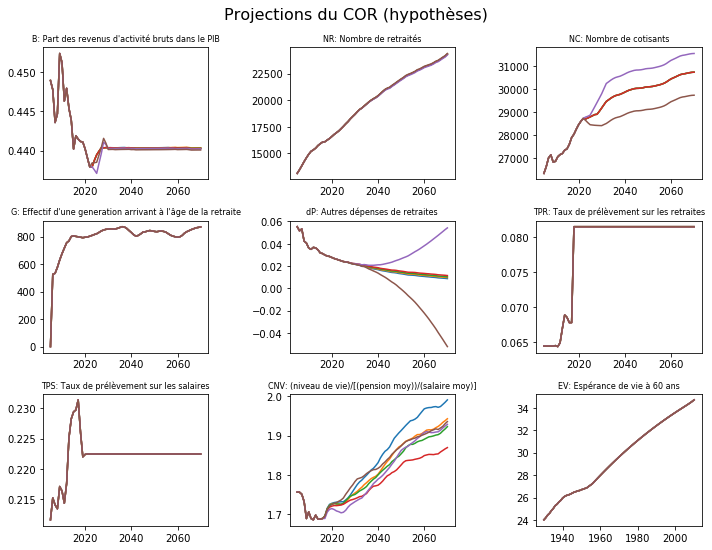

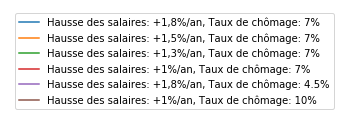

In [4]:
simulateur = SimulateurRetraites()
simulateur.dessineConjoncture()
simulateur.dessineLegende()
etudeImpact = EtudeImpact(simulateur)

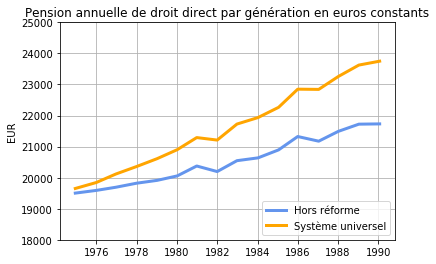

In [5]:
pl.plot(pension_annees, pension_HR, label = "Hors réforme", \
            color = etudeImpact.couleur_HR, linewidth = etudeImpact.epaisseur_ligne)
pl.plot(pension_annees, pension_SUR, label = "Système universel", \
            color = etudeImpact.couleur_SUR, linewidth = etudeImpact.epaisseur_ligne)
pl.ylabel("EUR")
pl.title("Pension annuelle de droit direct moyenne par génération en euros constants");
pl.grid()
pl.legend(loc='lower right');
pl.ylim(bottom=18000.0, top=25000.0);

## Age de départ à la retraite

Le graphique 73 page 199 de l’étude d’impact de Janvier 2020 présente l'âge moyen à la liquidation par génération.

![Graphique 73 : âge moyen à la liquidation par génération](EtudeImpact-Graphique-73-AgeDepartRetraite.png)


In [6]:
age_data = np.genfromtxt('EtudeImpact-Graphique-73-AgeDepartRetraite-propre.csv', delimiter=',')
age_data

array([[      nan,       nan,       nan],
       [1975.0402,   63.8823,   63.6343],
       [1976.0457,   64.0051,   63.7847],
       [1977.0593,   63.923 ,   63.7798],
       [1978.0209,   63.9905,   63.8953],
       [1979.0784,   63.9165,   63.8826],
       [1980.0236,   63.968 ,   64.0084],
       [1981.0326,   63.8915,   64.0015],
       [1982.0052,   64.0748,   64.1569],
       [1983.0198,   64.0588,   64.1927],
       [1983.9931,   64.1368,   64.2939],
       [1984.9802,   64.2098,   64.367 ],
       [1986.0114,   64.2848,   64.4804],
       [1987.0419,   64.2463,   64.4926],
       [1988.0201,   64.4312,   64.6746],
       [1989.0052,   64.4365,   64.6991],
       [1990.0087,   64.4477,   64.7587],
       [1990.9247,   64.4684,   64.8131],
       [1991.9864,   64.4343,   64.8331],
       [1992.9755,   64.4144,   64.8937],
       [1993.9705,   64.4283,   64.9175],
       [1994.9263,   64.4887,   65.0211],
       [1995.9345,   64.6277,   65.1386],
       [1997.042 ,   64.6446,   65

In [7]:
age_annees = age_data[:,0] # Année de naissance
age_avant = age_data[:,1] # Avant réforme
age_apres = age_data[:,2] # Après réforme

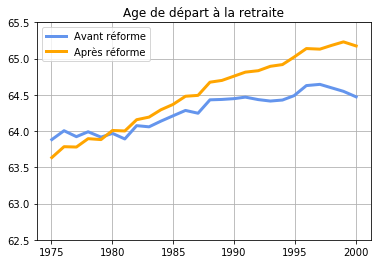

In [8]:
pl.plot(age_annees, age_avant, label = "Avant réforme", \
            color = etudeImpact.couleur_HR, linewidth = etudeImpact.epaisseur_ligne)
pl.plot(age_annees, age_apres, label = "Après réforme", \
            color = etudeImpact.couleur_SUR, linewidth = etudeImpact.epaisseur_ligne)
pl.title("Age moyen de départ à la retraite");
pl.grid()
pl.legend();
pl.ylim(bottom=62.5, top=65.5);